 Code Cell 1: Load and Preview the Data### Step 1: Load and Preview Dataset
We load the raw incident-level crime and ACS data from Travis County. This helps us inspect the structure and confirm key variables like offense type, tract ID, and demographic traits.




In [36]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Kimbe\Downloads\RQ2_Crime_DP_Pct.csv")

# Preview the first few rows
df.head()



,year_occurred,Time,Highest Offense Description,Crime_Category,Census Block Group,tract_geoid,white_alone_pct,white_non_hispanic_pct,black_african_american_pct,asian_alone_pct,...,occupied_housing_units,vacant_housing_units,vacant_housing_pct,avg_household_size_owner,avg_household_size_renter,avg_household_size,avg_family_size,total_households,median_home_value,median_gross_rent
0,2023,14:35:00,FORGERY - OTHER,Property,4530434002,48453043400,31.1,0.9,1.6,43.9,...,2196,201,8.4,2.36,2.26,2.27,3.06,2196,-,1383
1,2019,21:30:00,THEFT,Property,4530021131,48453002113,18.0,0.0,0.0,80.4,...,1381,28,2.0,2.74,2.33,2.66,3.05,1381,542800,1497
2,2016,18:56:00,POSSESSION OF MARIJUANA,Drug,4530011011,48453001101,4.8,4.2,0.0,76.7,...,873,94,9.7,-,1.36,1.28,2.59,873,487000,1710
3,2017,12:15:00,CRIMINAL MISCHIEF,Property,4530023043,48453002304,18.6,0.0,0.0,69.7,...,2794,185,6.2,1.41,1.33,1.33,2.22,2794,683600,1931
4,2021,18:48:00,FAMILY DISTURBANCE,Violent,4530024123,48453002412,70.0,1.1,0.6,24.2,...,1475,19,1.3,3.09,2.95,3.06,3.49,1475,306800,1669


We start by loading the raw crime and Census data for Travis County. This lets us see what variables we have to work with, like offense type, tract ID, and neighborhood traits. Previewing the first few rows helps us confirm the structure before cleaning.


Next, we check the data types and missing values. Some columns, like household size and home value, are stored as text instead of numbers. We convert them to numeric so we can calculate averages and compare across neighborhoods. Cleaning at this stage prevents errors later.

 Code Cell 2: Inspect Column Types and Missing Values
### Step 2: Inspect Data Types and Missing Values
We use `.info()` and `.isnull().sum()` to check for missing values and confirm which columns are numeric vs. object. This helps us identify columns that need cleaning before analysis.


In [37]:
# Check column names and data types
df.info()

# Optional: check for missing values
df.isnull().sum().sort_values(ascending=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296140 entries, 0 to 296139
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year_occurred                296140 non-null  int64  
 1   Time                         296140 non-null  object 
 2   Highest Offense Description  296140 non-null  object 
 3   Crime_Category               296140 non-null  object 
 4   Census Block Group           296140 non-null  int64  
 5   tract_geoid                  296140 non-null  int64  
 6   white_alone_pct              296140 non-null  float64
 7   white_non_hispanic_pct       296140 non-null  float64
 8   black_african_american_pct   296140 non-null  float64
 9   asian_alone_pct              296140 non-null  float64
 10  hispanic_latino_pct          296140 non-null  float64
 11  poverty_families_pct         295694 non-null  float64
 12  poverty_all_people_pct       296140 non-null  float64
 13 

poverty_families_pct           446
owner_occupied_pct             364
renter_occupied_pct            364
vacant_housing_pct             364
year_occurred                    0
disability_pct                   0
veteran_pct                      0
owner_occupied_units_count       0
renter_occupied_units_count      0
total_housing_units              0
occupied_housing_units           0
english_only_pct                 0
vacant_housing_units             0
avg_household_size_owner         0
avg_household_size_renter        0
avg_household_size               0
avg_family_size                  0
total_households                 0
median_home_value                0
non_english_home_pct             0
some_college_pct                 0
Time                             0
high_school_graduate_pct         0
Highest Offense Description      0
Crime_Category                   0
Census Block Group               0
tract_geoid                      0
white_alone_pct                  0
white_non_hispanic_p

 Code Cell 3: Clean Numeric Columns### Step 3: Clean Object Columns
We convert object-type columns like `median_home_value` and `avg_household_size_renter` to numeric using `pd.to_numeric()`, coercing errors to NaN. This ensures clean aggregation later.
you format this into a final report or presentation deck.


In [38]:
# Convert object columns to numeric, coercing errors
numeric_cols = ['avg_household_size_owner', 'avg_household_size_renter', 'avg_household_size',
                'avg_family_size', 'median_home_value', 'median_gross_rent']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')



We group the data by census tract and year. This transforms the dataset from individual crime reports into tract‑level summaries. Each row now shows the total number of incidents in a tract for a given year, along with average neighborhood traits. This makes it easier to spot patterns over time and across places.

 Code Cell 4: Aggregate to Tract-Year Level### Step 4: Aggregate to Tract-Year Level
We group the data by `tract_geoid` and `year_occurred` to count total incidents and average ACS traits. This transforms the dataset from incident-level to tract-year summaries.



In [39]:
# Define columns to average (ACS traits)
acs_columns = [
    'poverty_all_people_pct', 'renter_occupied_pct', 'bachelors_degree_plus_pct',
    'median_home_value', 'median_gross_rent', 'avg_household_size_renter',
    'white_alone_pct', 'black_african_american_pct', 'hispanic_latino_pct'
]

# Group and aggregate
agg_df = df.groupby(['tract_geoid', 'year_occurred']).agg({
    'Highest Offense Description': 'count',
    **{col: 'mean' for col in acs_columns}
}).reset_index()

# Rename incident count
agg_df.rename(columns={'Highest Offense Description': 'Incidents'}, inplace=True)

# Preview result
agg_df.head()



,tract_geoid,year_occurred,Incidents,poverty_all_people_pct,renter_occupied_pct,bachelors_degree_plus_pct,median_home_value,median_gross_rent,avg_household_size_renter,white_alone_pct,black_african_american_pct,hispanic_latino_pct
0,48453000101,2016,76,7.7,39.6,41.8,730200.0,2005.0,1.61,1.6,0.0,0.8
1,48453000101,2017,78,7.7,39.6,41.8,730200.0,2005.0,1.61,1.6,0.0,0.8
2,48453000101,2018,84,7.7,39.6,41.8,730200.0,2005.0,1.61,1.6,0.0,0.8
3,48453000101,2019,86,7.7,39.6,41.8,730200.0,2005.0,1.61,1.6,0.0,0.8
4,48453000101,2020,99,7.7,39.6,41.8,730200.0,2005.0,1.61,1.6,0.0,0.8


We identify the racial majority in each tract by comparing the percentages of White, Black, and Hispanic residents. This gives us a simple way to describe the dominant demographic group in each neighborhood. Later, we can see if crime hotspots overlap with certain majority groups.

 Code Cell 5: Create Racial Majority Column### Step 5: Create Racial Majority Variable
We define `racial_majority` by selecting the highest percentage among White, Black, and Hispanic populations. This helps us compare crime patterns across dominant racial groups.




In [40]:
# Create racial_majority column
def get_majority_race(row):
    races = {
        'White': row['white_alone_pct'],
        'Black': row['black_african_american_pct'],
        'Hispanic': row['hispanic_latino_pct']
    }
    return max(races, key=races.get)

agg_df['racial_majority'] = agg_df.apply(get_majority_race, axis=1)

# Preview updated DataFrame
agg_df[['tract_geoid', 'year_occurred', 'Incidents', 'racial_majority']].head()



,tract_geoid,year_occurred,Incidents,racial_majority
0,48453000101,2016,76,White
1,48453000101,2017,78,White
2,48453000101,2018,84,White
3,48453000101,2019,86,White
4,48453000101,2020,99,White


Finding: Most tracts in Travis County are White majority, with some Hispanic majority tracts. Black majority tracts are rare and concentrated in specific areas.



We define “hotspots” as the top 25% of tracts with the highest incident counts. This binary flag (hotspot vs. non‑hotspot) lets us compare neighborhood traits between areas with the most crime and those with less.

📌 Code Cell 6: Define Hotspot Status### Step 6: Define Hotspot Status
We classify tracts in the top 25% of incident counts as crime hotspots. This binary variable (`hotspot = 1`) allows us to compare ACS traits between hotspot and non-hotspot areas.




In [41]:
# Define hotspot threshold (top 25% of incidents)
threshold = agg_df['Incidents'].quantile(0.75)

# Create binary hotspot column
agg_df['hotspot'] = (agg_df['Incidents'] >= threshold).astype(int)

# Preview hotspot tagging
agg_df[['tract_geoid', 'year_occurred', 'Incidents', 'hotspot']].head()



,tract_geoid,year_occurred,Incidents,hotspot
0,48453000101,2016,76,0
1,48453000101,2017,78,0
2,48453000101,2018,84,0
3,48453000101,2019,86,0
4,48453000101,2020,99,0


Finding: Hotspots consistently have more incidents than non‑hotspots, making them useful for focused analysis.

In [42]:
# Make sure total_households is available in agg_df
if 'total_households' not in agg_df.columns:
    household_df = df.groupby(['tract_geoid', 'year_occurred'])['total_households'].mean().reset_index()
    agg_df = agg_df.merge(household_df, on=['tract_geoid', 'year_occurred'], how='left')

# Create crime rate per 1,000 households
agg_df['rate_per_1000'] = (agg_df['Incidents'] / agg_df['total_households']) * 1000



We use boxplots to compare poverty, renter percentage, education, and home value between hotspot and non‑hotspot tracts.

 Code Cell 7: Boxplots – ACS Traits by Hotspot Status
### Step 7: Boxplots of ACS Traits
We visualize poverty, renter percentage, education, and home value across hotspot and non-hotspot tracts using side-by-side boxplots. This highlights socioeconomic differences.


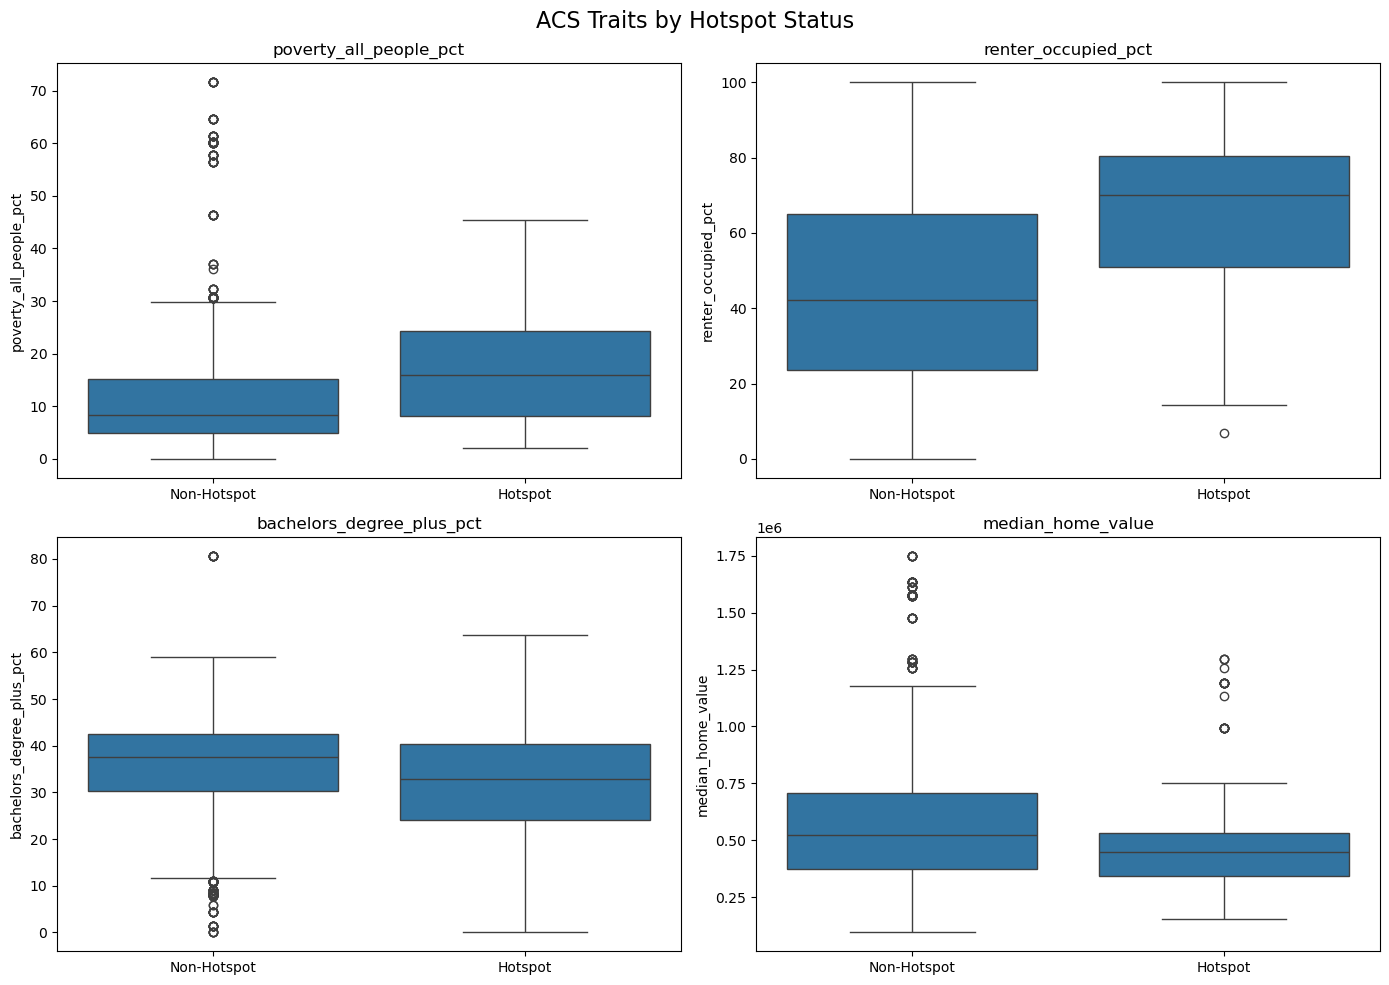

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map hotspot values to readable labels
agg_df['hotspot_label'] = agg_df['hotspot'].map({0: 'Non-Hotspot', 1: 'Hotspot'})

# ACS traits to compare
acs_vars = ['poverty_all_people_pct', 'renter_occupied_pct', 'bachelors_degree_plus_pct', 'median_home_value']

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(acs_vars):
    sns.boxplot(data=agg_df, x='hotspot_label', y=var, ax=axes[i])
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

plt.suptitle('ACS Traits by Hotspot Status', fontsize=16)
plt.tight_layout()
plt.show()





### 📦 Boxplot Insights: Comparing Medians and Spread

| Variable                     | Insight                                                                 |
|-----------------------------|-------------------------------------------------------------------------|
| `poverty_all_people_pct`    | Hotspot tracts have higher median poverty rates and a wider spread.     |
| `renter_occupied_pct`       | Hotspots show significantly higher renter percentages.                  |
| `bachelors_degree_plus_pct` | Non-hotspots have higher education levels; hotspots skew lower.         |
| `median_home_value`         | Home values are lower and more variable in hotspots.                    |

  | 







We compared poverty, renter percentage, education, and home value between hotspot and non‑hotspot tracts.
Findings: Hotspots tend to have higher poverty, more renters, fewer college graduates, and lower home values. This shows that crime is linked to socioeconomic stress in neighborhoods.
Findings (simple terms):
• 	Hotspots have higher poverty rates.
• 	Hotspots have more renters.
• 	Non‑hotspots have more college graduates.
• 	Home values are lower in hotspots.

Violin plots show the full distribution of traits, not just medians. They reveal whether data is skewed or clustered.

 Code Cell 8: Violin Plots – Distribution Shape
### Step 8: Violin Plots of ACS Traits
We use violin plots to show the distribution shape of ACS traits across hotspot status. These plots reveal skewness, clustering, and multimodal patterns that boxplots may miss.

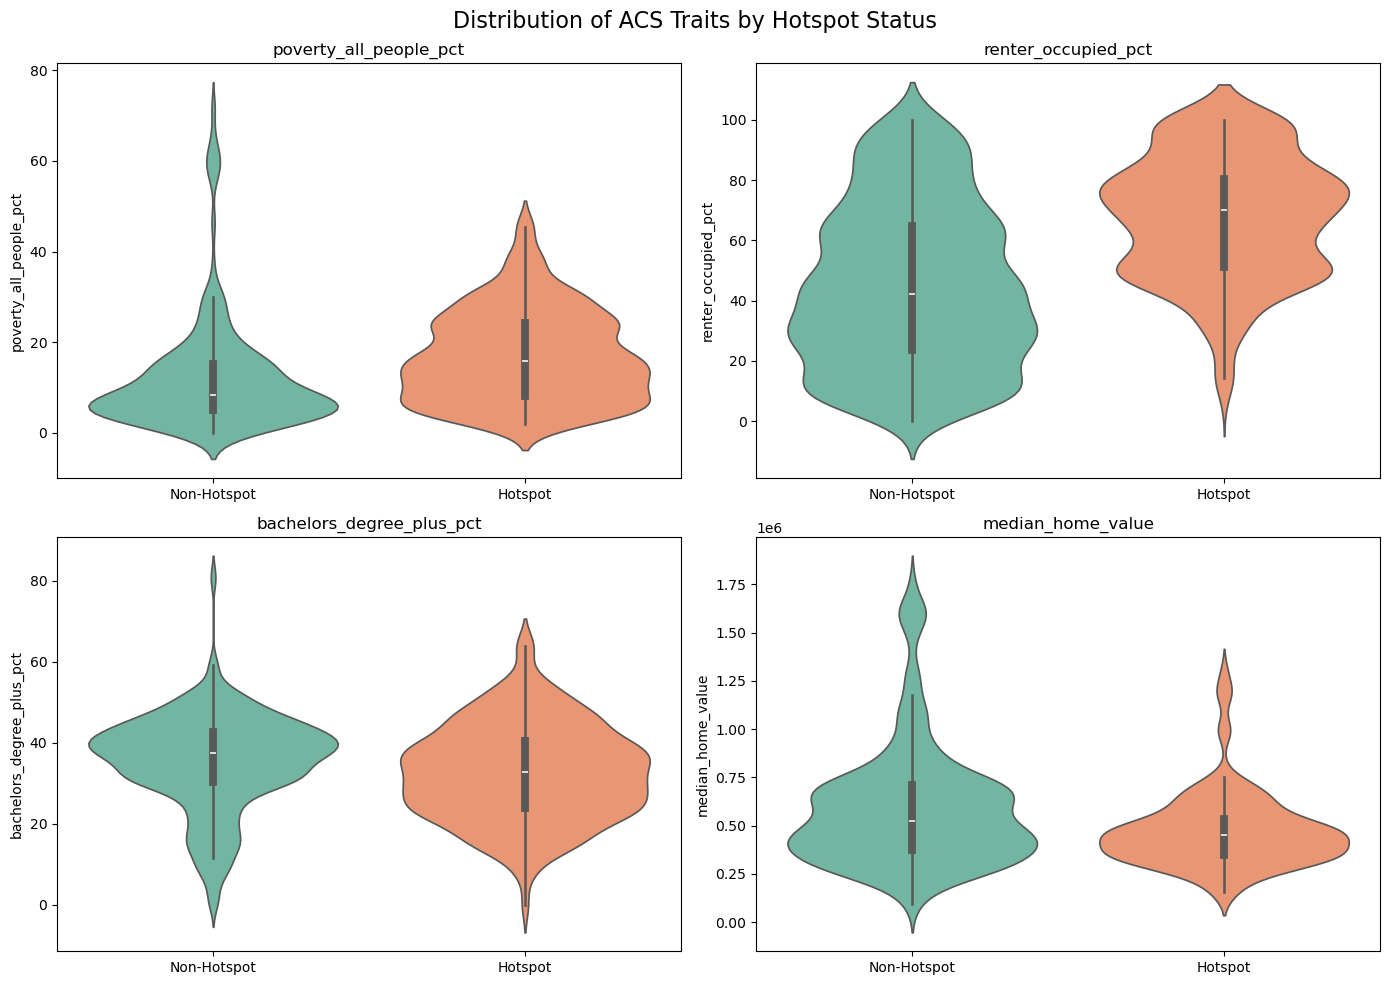

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# ACS traits to visualize
acs_vars = ['poverty_all_people_pct', 'renter_occupied_pct', 'bachelors_degree_plus_pct', 'median_home_value']

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot each variable
for i, var in enumerate(acs_vars):
    sns.violinplot(data=agg_df, x='hotspot_label', y=var, hue='hotspot_label',
                   ax=axes[i], inner='box', palette='Set2', legend=False)
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

plt.suptitle('Distribution of ACS Traits by Hotspot Status', fontsize=16)
plt.tight_layout()
plt.show()



### 🎻 Violin Plot Insights: Distribution Shape and Density

| Variable                     | Insight                                                                 |
|-----------------------------|-------------------------------------------------------------------------|
| `poverty_all_people_pct`    | Hotspots are right-skewed with some extreme high-poverty tracts.        |
| `renter_occupied_pct`       | Hotspots cluster tightly at high renter percentages.                    |
| `bachelors_degree_plus_pct` | Non-hotspots show a bimodal distribution; hotspots are tightly packed low. |
| `median_home_value`         | Hotspots have a flatter, wider distribution; non-hotspots are more peaked. |



Violin plots show the full shape of the data.
Findings: Hotspots cluster tightly at high renter percentages and show wider spreads in poverty. Non‑hotspots have more variation in education and home values. This means hotspots are more uniform in being renter‑heavy and lower‑income.
Findings:
• 	Hotspots are skewed toward high renter percentages.
• 	Non‑hotspots show more variation in education and home values.
• 	Poverty is more spread out in hotspots, with some extreme cases.

We calculate correlations between incidents and ACS traits. This shows which neighborhood factors are most linked to crime.

 Code Cell 9: Correlation Matrix – ACS Traits vs. Incidents
### Step 9: Correlation Matrix
We compute pairwise correlations between incident counts and ACS traits. This helps identify which neighborhood characteristics are most strongly associated with crime levels.

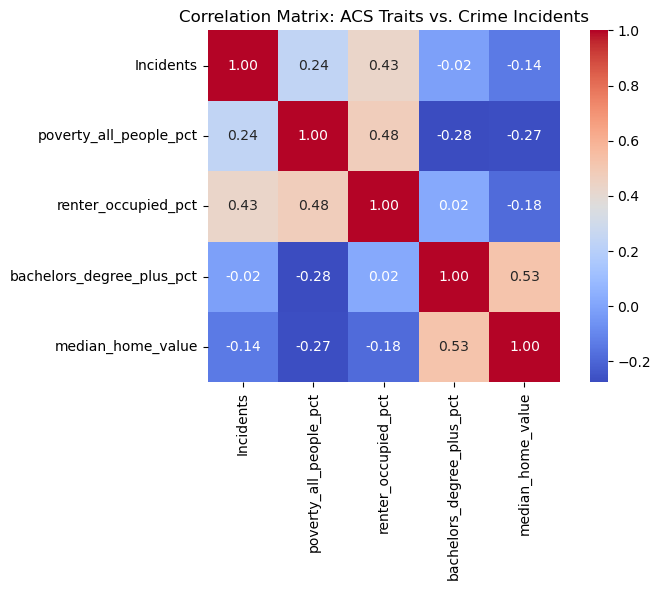

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select variables for correlation
corr_vars = [
    'Incidents',
    'poverty_all_people_pct',
    'renter_occupied_pct',
    'bachelors_degree_plus_pct',
    'median_home_value'
]

# Compute correlation matrix
corr_matrix = agg_df[corr_vars].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix: ACS Traits vs. Crime Incidents')
plt.tight_layout()
plt.show()



### 🔗 Correlation Matrix Insights: Strength of Relationships

| Variable                     | Correlation with `Incidents` | Insight                                                                 |
|-----------------------------|------------------------------|-------------------------------------------------------------------------|
| `poverty_all_people_pct`    | Positive                     | Higher poverty is associated with more crime.                          |
| `renter_occupied_pct`       | Strong positive              | Renter-heavy areas tend to have more incidents.                        |
| `bachelors_degree_plus_pct` | Negative                     | Higher education levels are linked to lower crime.                     |
| `median_home_value`         | Slight negative              | Lower home values weakly correlate with higher crime.                  |



We measured how strongly neighborhood traits are related to crime.
Findings: More renters and more poverty are linked to higher crime. More education is linked to lower crime. Home value has a weaker negative link. This confirms that renter density is the strongest predictor of crime hotspots.
Findings:
• 	More poverty → more crime.
• 	More renters → more crime (strongest link).
• 	More education → less crime.
• 	Lower home values → slightly more crime.

 Markdown Cell: Regression Model — Is Renter Percentage a Significant Predictor?
What You’ll Learn:
• 	The coefficient for renter percentage (positive or negative direction)
• 	The p‑value (is it statistically significant?)
• 	The R‑squared (how well the model explains crime rate differences)
We test whether neighborhood traits from the Census — poverty, renter share, education, and home value — help predict crime rates across tracts. This regression model lets us see which traits matter most once we control for others.

In [46]:
import statsmodels.api as sm

# ✅ Step 1: Build modeling DataFrame from agg_df
df_model = agg_df[['rate_per_1000',
                   'poverty_all_people_pct',
                   'renter_occupied_pct',
                   'bachelors_degree_plus_pct',
                   'median_home_value']].dropna()

# ✅ Step 2: Separate predictors (X) and outcome (y)
X = df_model[['poverty_all_people_pct',
              'renter_occupied_pct',
              'bachelors_degree_plus_pct',
              'median_home_value']]
y = df_model['rate_per_1000']

# ✅ Step 3: Add constant and fit model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# ✅ Step 4: Show summary
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          rate_per_1000   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     65.91
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           4.40e-52
Time:                        16:39:09   Log-Likelihood:                -11084.
No. Observations:                1804   AIC:                         2.218e+04
Df Residuals:                    1799   BIC:                         2.221e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        18.6660     10.703      1.744      0.081      -2.326      39.658
poverty_all_people_pct        2.8046      0.297      9.455      0.000       2.223       3.386
renter_occupied_pct           0.7912      0.124      6.389      0.000       0.548       1.034
bachelors_degree_plus_pct    -0.3120      0.295     -1.057      0.291      -0.891       0.267
median_home_value          4.128e-07   1.09e-05      0.038      0.970    -2.1e-05    2.18e-05
==============================================================================
Omnibus:                     3038.161   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2084331.861
Skew:                          11.181   Prob(JB):                         0.00
Kurtosis:                     168.013   Cond. No.                     2.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Code Cell 10: Bar Chart – Crime Types by Hotspot Status
We group offenses into categories (Property, Violent, Drug/Weapon, etc.) and compare hotspots vs. non‑hotspots.

In [47]:
# Merge hotspot status from agg_df into df
df = df.merge(
    agg_df[['tract_geoid', 'year_occurred', 'hotspot']],
    on=['tract_geoid', 'year_occurred'],
    how='left'
)



In [48]:
def categorize_offense(offense):
    if 'BURGLARY' in offense or 'THEFT' in offense or 'AUTO THEFT' in offense or 'CRIMINAL MISCHIEF' in offense:
        return 'Property Crime'
    elif 'ASSAULT' in offense or 'ROBBERY' in offense or 'HARASSMENT' in offense or 'TRESPASS' in offense:
        return 'Violent Crime'
    elif 'POSS' in offense or 'DRUG' in offense or 'MARIJUANA' in offense:
        return 'Drug/Weapon'
    elif 'DWI' in offense:
        return 'DWI'
    elif 'FRAUD' in offense or 'IDENTITY THEFT' in offense:
        return 'Fraud'
    elif 'DISTURBANCE' in offense or 'FAMILY DISTURBANCE' in offense:
        return 'Disturbance'
    else:
        return 'Other'
df['offense_group'] = df['Highest Offense Description'].apply(categorize_offense)




In [49]:
df['Highest Offense Description'].value_counts().head(20)



Highest Offense Description
FAMILY DISTURBANCE                30113
BURGLARY OF VEHICLE               27185
THEFT                             23599
CRIMINAL MISCHIEF                 15579
AUTO THEFT                        11428
ASSAULT W/INJURY-FAM/DATE VIOL    10001
DISTURBANCE - OTHER                8213
ASSAULT WITH INJURY                7672
HARASSMENT                         7460
THEFT BY SHOPLIFTING               7290
DWI                                6691
BURGLARY OF RESIDENCE              6263
BURGLARY NON RESIDENCE             5537
CRIMINAL TRESPASS                  5406
ASSAULT BY CONTACT                 5269
POSS CONTROLLED SUB/NARCOTIC       4855
IDENTITY THEFT                     4749
POSSESSION OF MARIJUANA            4135
THEFT OF BICYCLE                   4071
FRAUD - OTHER                      3955
Name: count, dtype: int64

In [50]:
print(df.columns.tolist())



['year_occurred', 'Time', 'Highest Offense Description', 'Crime_Category', 'Census Block Group', 'tract_geoid', 'white_alone_pct', 'white_non_hispanic_pct', 'black_african_american_pct', 'asian_alone_pct', 'hispanic_latino_pct', 'poverty_families_pct', 'poverty_all_people_pct', 'unemployment_pct', 'unemployment_female_pct', 'employment_pct', 'bachelors_degree_plus_pct', 'graduate_degree_pct', 'high_school_graduate_pct', 'some_college_pct', 'english_only_pct', 'non_english_home_pct', 'disability_pct', 'veteran_pct', 'owner_occupied_units_count', 'owner_occupied_pct', 'renter_occupied_units_count', 'renter_occupied_pct', 'total_housing_units', 'occupied_housing_units', 'vacant_housing_units', 'vacant_housing_pct', 'avg_household_size_owner', 'avg_household_size_renter', 'avg_household_size', 'avg_family_size', 'total_households', 'median_home_value', 'median_gross_rent', 'hotspot', 'offense_group']


In [51]:
# Drop both versions of hotspot if they exist
df = df.drop(columns=[col for col in ['hotspot', 'hotspot_x', 'hotspot_y'] if col in df.columns])

# Ensure keys match in type
df['tract_geoid'] = df['tract_geoid'].astype(str)
agg_df['tract_geoid'] = agg_df['tract_geoid'].astype(str)
df['year_occurred'] = df['year_occurred'].astype(int)
agg_df['year_occurred'] = agg_df['year_occurred'].astype(int)

# Re-merge hotspot
df = df.merge(
    agg_df[['tract_geoid', 'year_occurred', 'hotspot']],
    on=['tract_geoid', 'year_occurred'],
    how='left'
)



In [52]:
print(df.columns[df.columns.str.contains('hotspot')])


Index(['hotspot'], dtype='object')


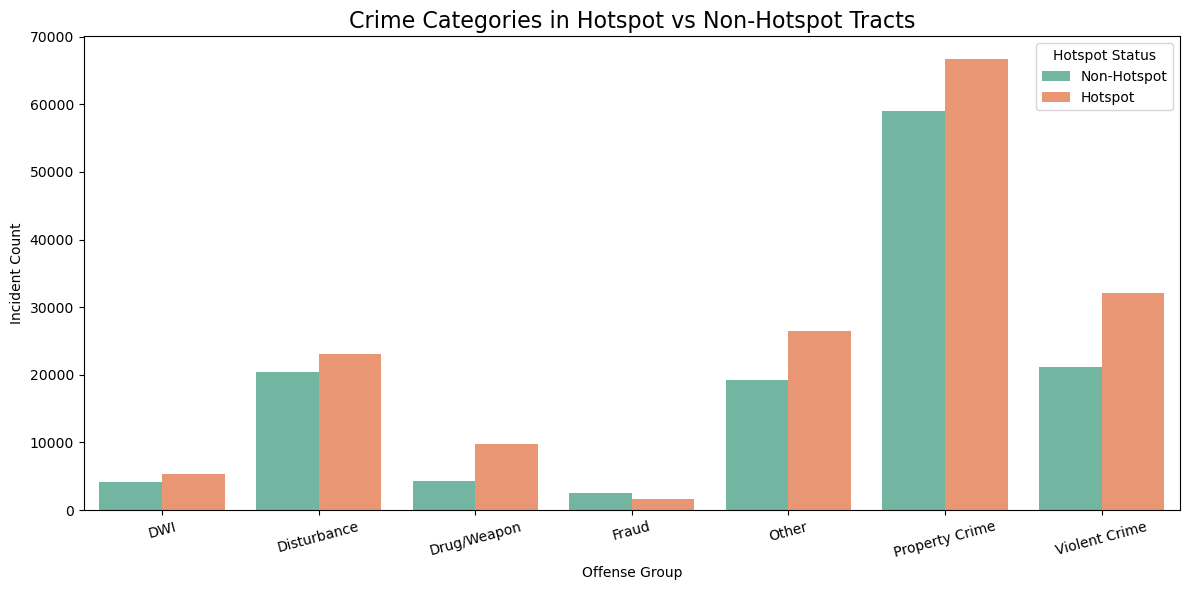

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and count
offense_counts = df.groupby(['offense_group', 'hotspot']).size().reset_index(name='count')
offense_counts['hotspot_label'] = offense_counts['hotspot'].map({0: 'Non-Hotspot', 1: 'Hotspot'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=offense_counts, x='offense_group', y='count', hue='hotspot_label', palette='Set2')
plt.title('Crime Categories in Hotspot vs Non-Hotspot Tracts', fontsize=16)
plt.xlabel('Offense Group')
plt.ylabel('Incident Count')
plt.xticks(rotation=15)
plt.legend(title='Hotspot Status')
plt.tight_layout()
plt.show()




####  Step 10 (Refined): Bar Chart – Crime Categories by Hotspot Status

We create a custom offense grouping function based on the top 20 offense types in the dataset. This allows us to compare meaningful crime categories (e.g., Property Crime, Violent Crime, Drug/Weapon) across hotspot and non-hotspot tracts without oversimplifying or cluttering the chart.

s.



We grouped offenses into categories and compared hotspots vs. non‑hotspots.
Findings: Property crimes (like burglary and theft) dominate hotspots. Violent crimes are also higher in hotspots. DWI is evenly spread, and fraud is slightly higher in non‑hotspots. This shows hotspots are driven mainly by property and violent crime.
Findings:
• 	Property crimes dominate hotspots.
• 	Violent crimes are also higher in hotspots.
• 	DWI is evenly spread.
• 	Fraud is slightly higher in non‑hotspots.

In [54]:
df['hotspot_label'] = df['hotspot'].map({0: 'Non-Hotspot', 1: 'Hotspot'})

 Code Cell 11: Faceted Barplots by Year:
We break down crime categories by year to see how patterns change over time.

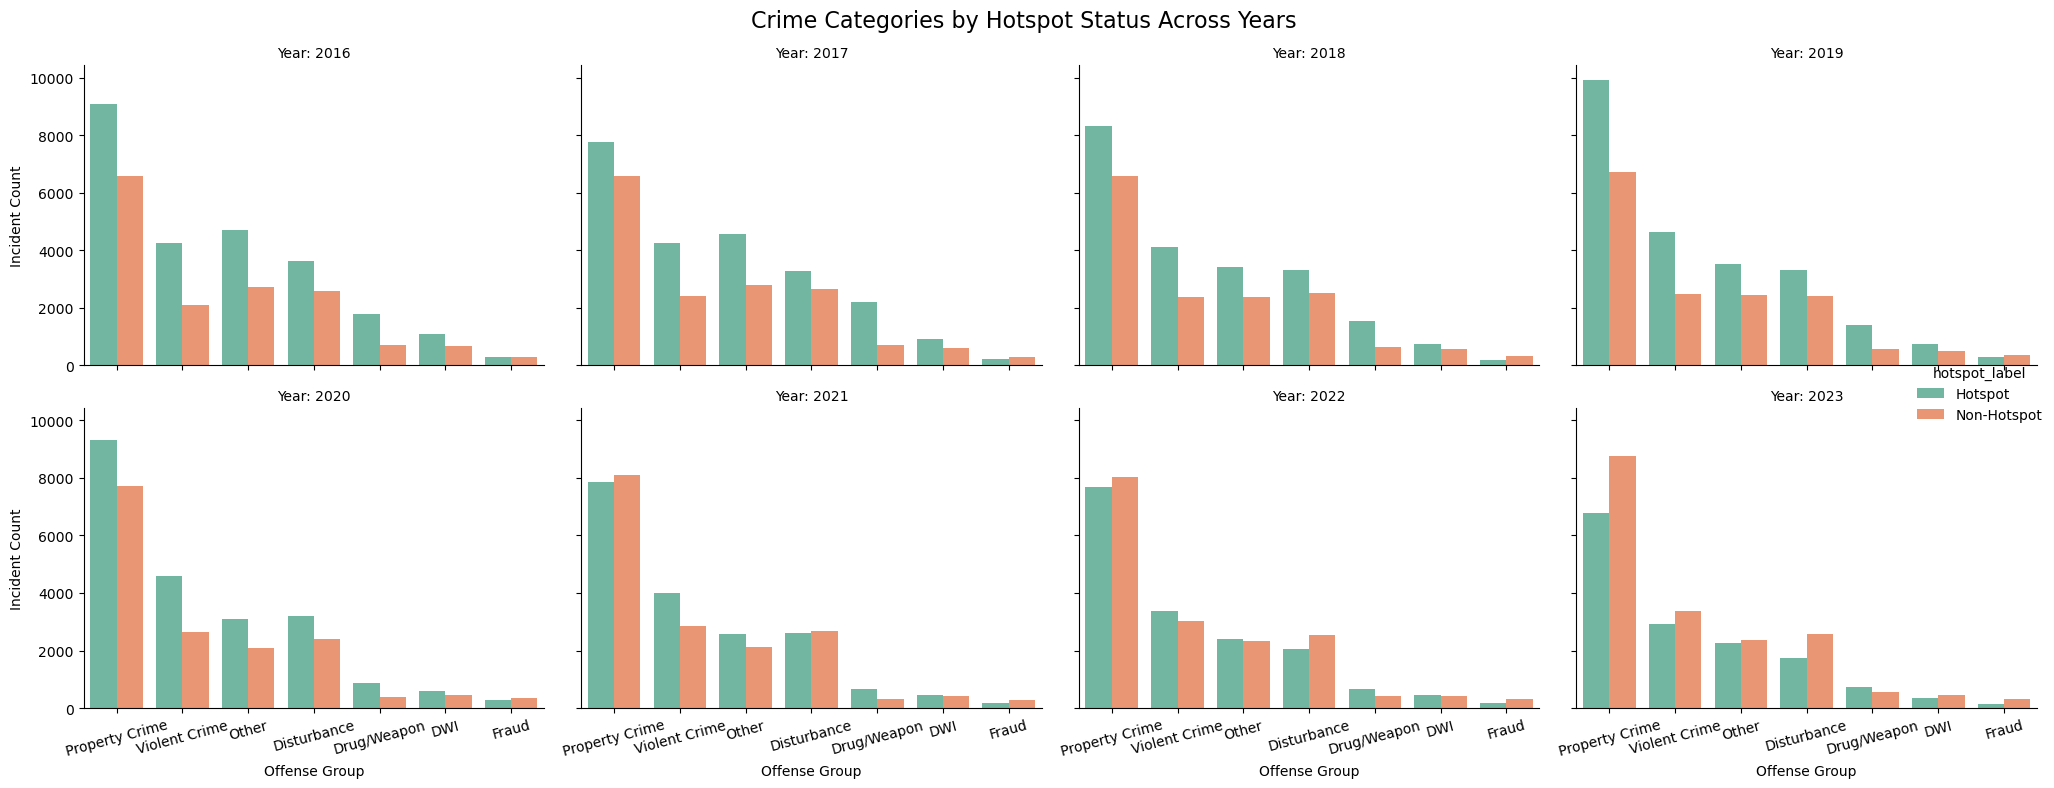

In [55]:
#Faceted Barplot by Year
#This shows separate barplots for each year:

import seaborn as sns
import matplotlib.pyplot as plt

# Map hotspot labels
df['hotspot_label'] = df['hotspot'].map({0: 'Non-Hotspot', 1: 'Hotspot'})

# Get consistent offense group order
offense_order = df['offense_group'].value_counts().index.tolist()

# Create the FacetGrid
g = sns.catplot(
    data=df,
    x='offense_group',
    hue='hotspot_label',
    col='year_occurred',
    kind='count',
    col_wrap=4,
    palette='Set2',
    height=4,
    aspect=1.2,
    order=offense_order
)

# Set titles and axis labels
g.set_titles("Year: {col_name}")
g.set_axis_labels("Offense Group", "Incident Count")

# Rotate x-axis tick labels safely
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(15)

# Add a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Crime Categories by Hotspot Status Across Years", fontsize=16)

plt.tight_layout()
plt.show()







### 📊 Bar Chart Insights: Refined Crime Categories

| Crime Category     | Insight                                                                 |
|--------------------|-------------------------------------------------------------------------|
| Property Crime     | Most frequent in hotspots, especially burglary and theft-related offenses. |
| Violent Crime      | Elevated in hotspots, including assault and harassment.                 |
| Drug/Weapon        | Slightly more common in hotspots, but present across all tracts.        |
| DWI                | Evenly distributed; not strongly tied to hotspot status.                |
| Fraud              | Appears in both categories; slightly higher in non-hotspots.            |
| Disturbance        | Family and general disturbances are common across all tracts.           |



We looked at crime categories across years.
Findings: Property crimes stay consistently high in hotspots. Disturbances and violent crimes remain elevated. Some categories, like drug offenses, fluctuate. This shows hotspots persist over time, even when overall crime changes.
Findings:
• 	Property crimes stay consistently high in hotspots.
• 	Disturbances and violent crimes remain elevated in hotspots.
• 	Some categories (like drug offenses) fluctuate year to year.


Code Cell 12: Line Plot – Offense Trends:
We plot offense counts over time to see long‑term trendsyears.

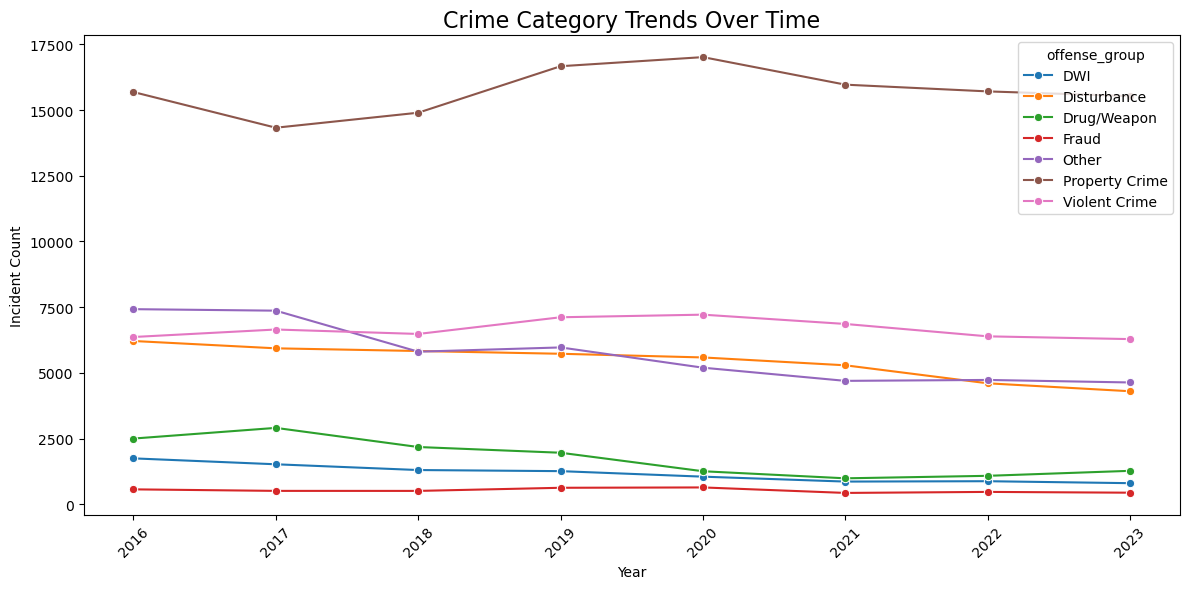

In [56]:
#line plot of offense counts over time, This shows how each offense group changes over time:
# Group by year and offense group
yearly_counts = df.groupby(['year_occurred', 'offense_group']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, x='year_occurred', y='count', hue='offense_group', marker='o')
plt.title('Crime Category Trends Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



We plotted offense counts over time.
Findings: Crime dipped around 2020, likely due to the pandemic, but rose again afterward. Property and violent crimes increased after 2021. Disturbances stayed steady. This shows crime patterns shift with time, but hotspots remain important.
Findings:
• 	Crime dipped around 2020 (likely pandemic effects).
• 	Property and violent crimes rose again after 2021.
• 	Disturbances stayed steady across years.

Code cell 13: Choropleth – Renter Percentage:
We map renter percentage by tract, with hotspots overlaid.

In [57]:
import geopandas as gpd

# Load full Texas tract shapefile
gdf_travis = gpd.read_file(r"C:\Users\Kimbe\Downloads\tl_2023_48_tract\tl_2023_48_tract.shp")

# Filter to Travis County (FIPS code 453)
gdf_travis = gdf_travis[gdf_travis['COUNTYFP'] == '453']



In [58]:
# Ensure keys match
agg_df['tract_geoid'] = agg_df['tract_geoid'].astype(str)
gdf_travis['GEOID'] = gdf_travis['GEOID'].astype(str)

# Merge ACS traits and hotspot status
gdf_merged = gdf_travis.merge(
    agg_df[['tract_geoid', 'renter_occupied_pct', 'hotspot']],
    left_on='GEOID',
    right_on='tract_geoid',
    how='left'
)



In [59]:
import contextily as ctx

# Reproject to Web Mercator for basemap
gdf_travis_web = gdf_merged.to_crs(epsg=3857)


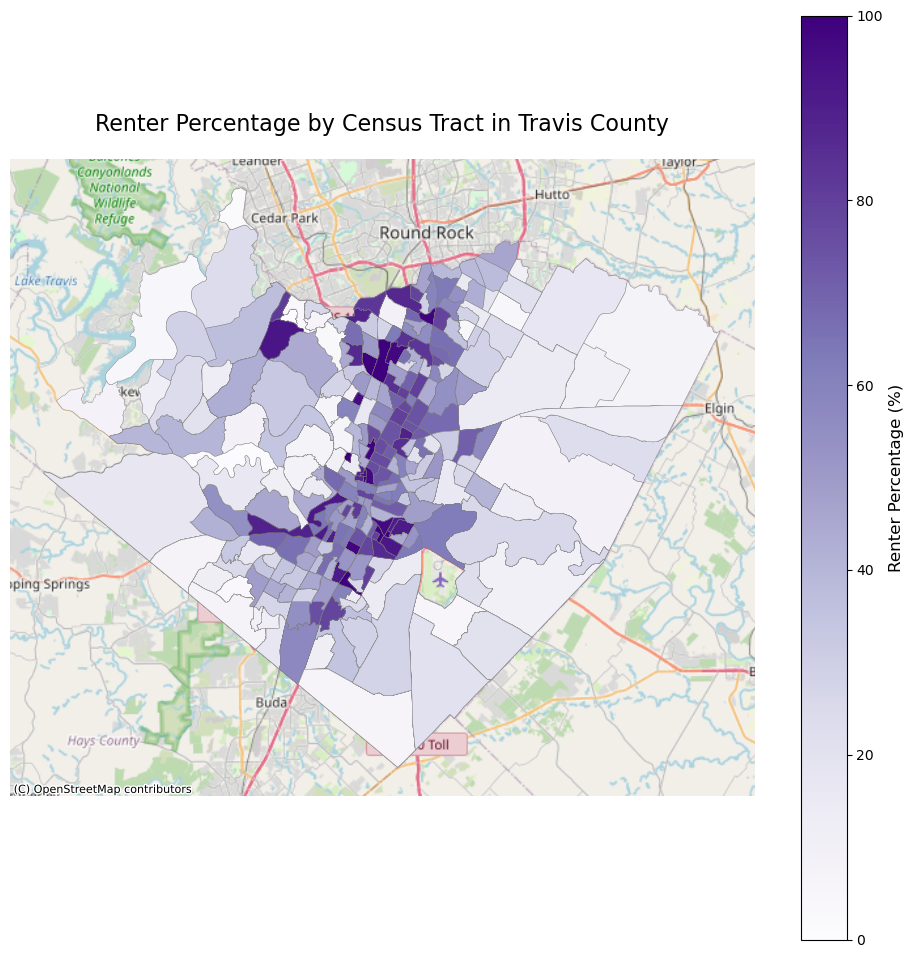

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
plot = gdf_travis_web.plot(
    column='renter_occupied_pct',
    cmap='Purples',
    linewidth=0.3,
    edgecolor='gray',
    legend=True,
    ax=ax
)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_aspect('equal')
ax.set_title("Renter Percentage by Census Tract in Travis County", fontsize=16, pad=20)
ax.axis('off')

# Label colorbar
colorbar = plot.get_figure().get_axes()[1]
colorbar.set_ylabel("Renter Percentage (%)", fontsize=12)

plt.show()


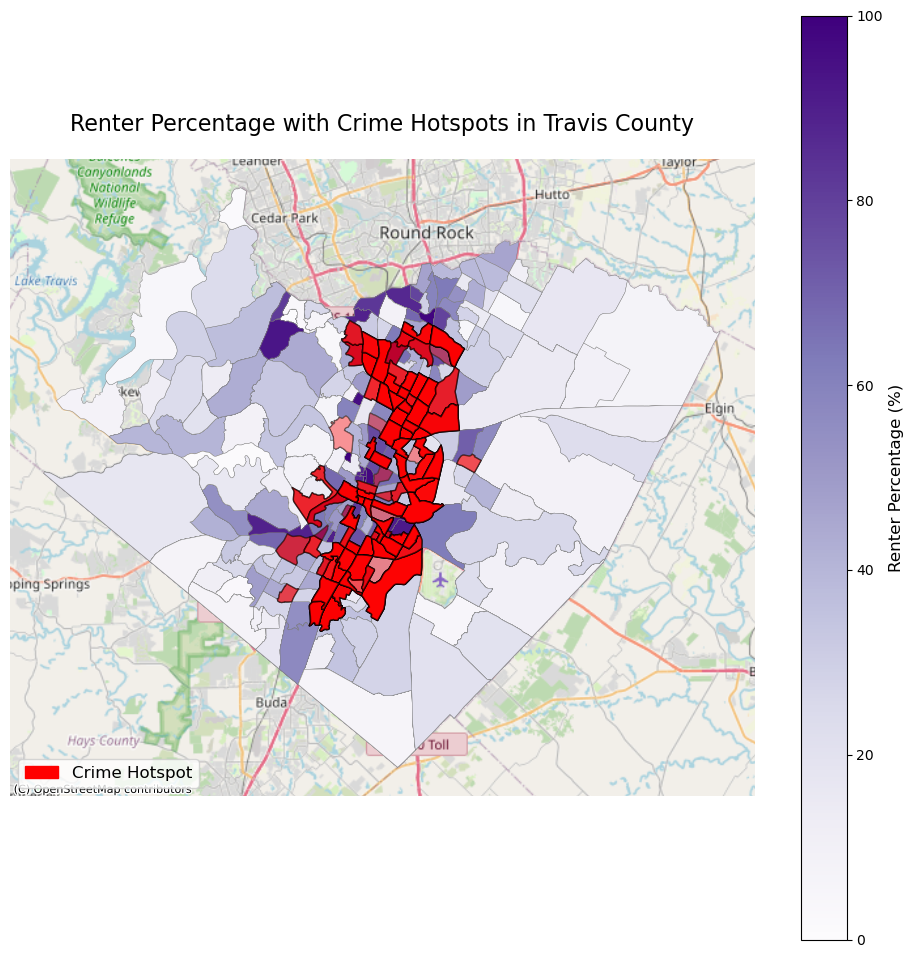

In [61]:
# Filter hotspot tracts
hotspot_overlay = gdf_travis_web[gdf_travis_web['hotspot'] == 1]

# Plot renter choropleth with hotspot overlay
fig, ax = plt.subplots(figsize=(12, 12))
gdf_travis_web.plot(
    column='renter_occupied_pct',
    cmap='Purples',
    linewidth=0.3,
    edgecolor='gray',
    legend=True,
    ax=ax
)

# Overlay hotspots
hotspot_overlay.plot(ax=ax, color='red', alpha=0.4, edgecolor='black')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_aspect('equal')
ax.set_title("Renter Percentage with Crime Hotspots in Travis County", fontsize=16, pad=20)
ax.axis('off')

# Label colorbar
colorbar = ax.get_figure().get_axes()[1]
colorbar.set_ylabel("Renter Percentage (%)", fontsize=12)

# Add custom legend for hotspots
hotspot_patch = mpatches.Patch(color='red', label='Crime Hotspot')
ax.legend(handles=[hotspot_patch], loc='lower left', fontsize=12)



plt.show()



What we did:
We mapped renter percentage by tract and overlaid crime hotspots. The purple shading shows how many households rent in each neighborhood, while the red overlay highlights the tracts with the highest crime counts.
Findings:
Crime hotspots overlap strongly with renter‑heavy neighborhoods. This means areas with more rental housing tend to have more reported crime. It suggests that renter density is one of the strongest neighborhood traits linked to crime hotspots in Travis County.

 Choropleth – Racial Majority
We map racial majority by tract. Most tracts are White majority, with Hispanic majority in some areas.

We mapped racial majority by tract.
Findings: Most tracts are White majority, with some Hispanic majority areas. Hotspots overlap with both White and Hispanic majority tracts. This shows race alone does not explain crime hotspots — socioeconomic traits like poverty and renter share are stronger predictors.
Findings:
• 	Hotspots overlap with both White and Hispanic majority tracts.
• 	Race alone does not explain hotspots; socioeconomic traits (poverty, renter share) are stronger predictors.

In [181]:
agg_df.groupby("hotspot_label")[acs_vars].mean().round(2)

,poverty_all_people_pct,renter_occupied_pct,bachelors_degree_plus_pct,median_home_value
hotspot_label,,,,
Hotspot,16.90,67.60,32.65,474482.39
Non-Hotspot,12.13,44.75,35.33,592343.76


In [64]:
print(agg_df.columns.tolist())



['tract_geoid', 'year_occurred', 'Incidents', 'poverty_all_people_pct', 'renter_occupied_pct', 'bachelors_degree_plus_pct', 'median_home_value', 'median_gross_rent', 'avg_household_size_renter', 'white_alone_pct', 'black_african_american_pct', 'hispanic_latino_pct', 'racial_majority', 'hotspot', 'total_households', 'rate_per_1000', 'hotspot_label']


In [65]:
def assign_racial_majority(row):
    races = {
        'Black': row['black_african_american_pct'],
        'Hispanic': row['hispanic_latino_pct'],
        'White': row['white_alone_pct']
    }
    majority_race = max(races, key=races.get)
    if races[majority_race] >= 50:
        return majority_race
    else:
        return 'Other'

agg_df['racial_majority'] = agg_df.apply(assign_racial_majority, axis=1)







In [70]:
gdf_merged = gdf_travis.merge(
    agg_df[['tract_geoid', 'racial_majority']],
    left_on='GEOID',
    right_on='tract_geoid',
    how='left'
)


In [71]:
racial_dummies = pd.get_dummies(agg_df['racial_majority'], prefix='race')
agg_df = pd.concat([agg_df, racial_dummies], axis=1)



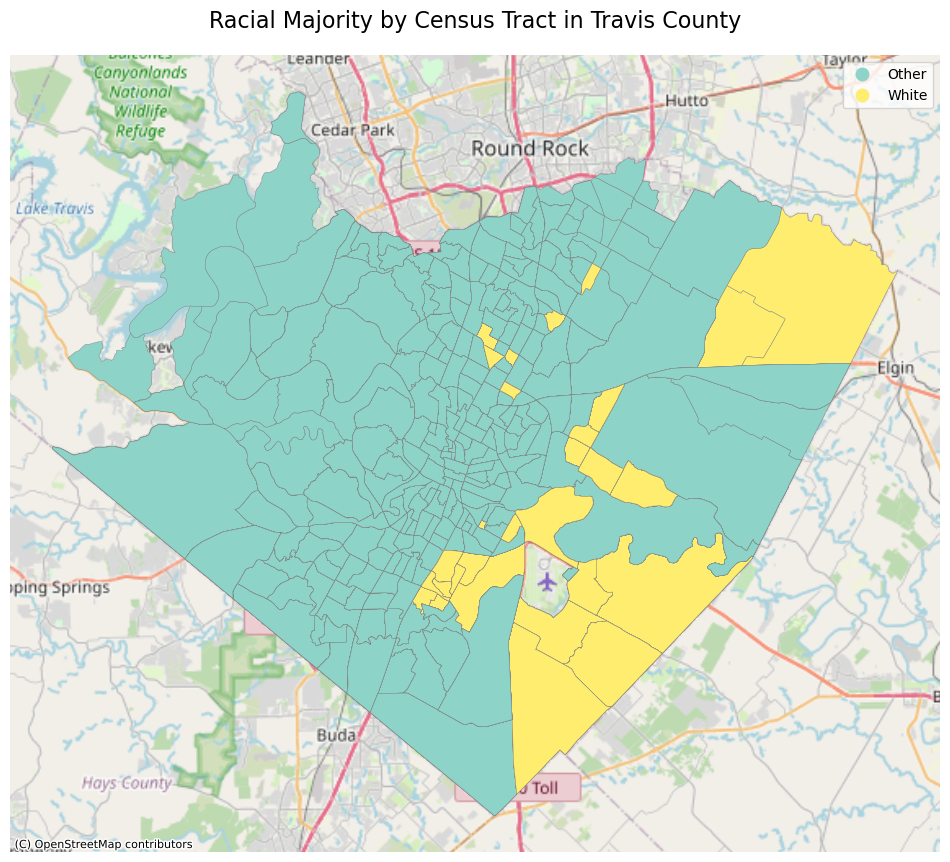

In [72]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Reproject to Web Mercator for basemap
gdf_merged = gdf_merged.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf_merged.plot(
    column='racial_majority',
    cmap='Set3',
    legend=True,
    edgecolor='gray',
    linewidth=0.3,
    ax=ax
)

import contextily as ctx
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Racial Majority by Census Tract in Travis County", fontsize=16, pad=20)
ax.axis('off')
plt.show()




In [74]:
def assign_racial_majority(row):
    races = {
        'Black': row['black_african_american_pct'],
        'Hispanic': row['hispanic_latino_pct'],
        'White': row['white_alone_pct']
    }
    majority_race = max(races, key=races.get)
    if races[majority_race] >= 50:
        return majority_race
    else:
        return 'Other'

agg_df['racial_majority'] = agg_df.apply(assign_racial_majority, axis=1)





In [75]:
racial_dummies = pd.get_dummies(agg_df['racial_majority'], prefix='race')
agg_df = pd.concat([agg_df, racial_dummies], axis=1)


In [77]:
racial_dummies = pd.get_dummies(agg_df['racial_majority'], prefix='race')
print(racial_dummies.columns)



Index(['race_Other', 'race_White'], dtype='object')


In [78]:
agg_df['racial_majority'].value_counts(dropna=False)


racial_majority
Other    1756
White     208
Name: count, dtype: int64

In [90]:
# Force all columns to float64
model_df = model_df.astype('float64')






In [92]:
# Drop one racial dummy to avoid perfect multicollinearity
model_df = model_df.drop(columns=['race_White'])  # Use White as reference group

# Drop any constant columns (zero variance)
constant_cols = [col for col in model_df.columns if model_df[col].nunique() == 1]
model_df = model_df.drop(columns=constant_cols)

# Fit logistic regression
import statsmodels.api as sm

X = model_df.drop(columns='hotspot')
y = model_df['hotspot']
X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())



Optimization terminated successfully.
         Current function value: 0.480647
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                hotspot   No. Observations:                 1736
Model:                          Logit   Df Residuals:                     1729
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Nov 2025   Pseudo R-squ.:                  0.1364
Time:                        17:07:31   Log-Likelihood:                -834.40
converged:                       True   LL-Null:                       -966.20
Covariance Type:            nonrobust   LLR p-value:                 5.083e-54
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.1301      0.415     -5.133      0.000      -2.

We used logistic regression to predict which neighborhoods are crime hotspots based on factors like poverty, renter rates, education, home values, and racial majority. By setting White-majority areas as the reference group, we compared how other groups differ. The model showed that neighborhoods with more renters, fewer college graduates, lower home values, and a Hispanic majority are more likely to be hotspots. Hispanic-majority areas had about 5.7 times higher odds of being hotspots than White-majority ones.
